In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar as can


In [18]:
file = pd.read_csv('C:\\Users\\akash\\Downloads\\PYTHON\\data_jobs.csv')

In [ ]:
soft_jobs = pd.read_csv('C:\\Users\\akash\\Downloads\\PYTHON\\software_jobs.csv')

In [ ]:
data_jobs = file.copy()
data_jobs.info()

In [41]:
data_jobs.job_posted_date = pd.to_datetime(data_jobs.job_posted_date)

In [42]:
data_jobs['job_posted_month'] = data_jobs.job_posted_date.dt.month_name()

In [51]:
month_list = list(can.month_name[1:])
data_jobs['job_posted_month'] = pd.Categorical(data_jobs['job_posted_month'], categories= month_list, ordered= True)


roles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

data_jobs_table = data_jobs.pivot_table(
    index= 'job_posted_month',
    columns= 'job_title_short',
    aggfunc= 'size'
)

data_jobs_table = data_jobs_table[roles]

data_jobs_table

C:\Users\akash\AppData\Local\Temp\ipykernel_27504\2882877697.py:7: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  data_jobs_table = data_jobs.pivot_table(


job_title_short,Data Analyst,Data Engineer,Data Scientist
job_posted_month,,,
January,23585,21419,20760
February,16558,15899,13951
March,16243,16093,13569
April,15514,14891,13513
May,13423,13646,11745
June,16008,15501,13615
July,16095,14518,14177
August,18628,15622,16984
September,14969,14918,13577


In [57]:
soft_jobs.set_index('job_posted_month', inplace= True)
soft_jobs

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,13619,9827,5108,4348
February,11456,9116,7298,4284
March,11102,8178,5814,4159
April,14037,9209,7232,4220
May,12126,8864,6718,4980
June,12003,8065,5902,4781
July,11914,8061,6839,4344
August,11571,8191,7413,4104
September,14016,8447,6139,4094


In [59]:
data_merged = data_jobs_table.merge(soft_jobs, on= 'job_posted_month' )

In [71]:
# plot top 5 jobs based on the count in the year 

top_5 = (data_merged.
         sum().
         head().
         sort_values(ascending= False).
         index.
         to_list()
         )



(0.0, 30000.0)

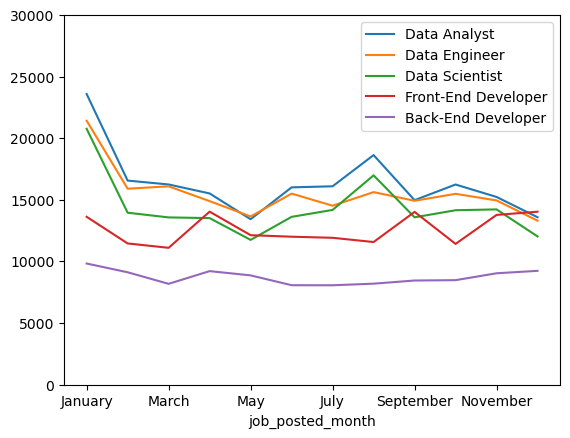

In [72]:
data_merged[top_5].plot(kind= 'line')
plt.ylim(0,30000)